In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start_date='2017-01-01'
end_date='2023-12-31'
stocks=['NFLX']
df=yf.download(stocks,start=start_date,end=end_date)[['Open','Close']]
df

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
2017-01-03,124.959999,127.489998
2017-01-04,127.489998,129.410004
2017-01-05,129.220001,131.809998
2017-01-06,132.080002,131.070007
2017-01-09,131.479996,130.949997
...,...,...
2023-12-22,494.000000,486.760010
2023-12-26,489.390015,491.190002
2023-12-27,491.239990,491.790009


In [3]:
df[df.columns[0]]

Date
2017-01-03    124.959999
2017-01-04    127.489998
2017-01-05    129.220001
2017-01-06    132.080002
2017-01-09    131.479996
                 ...    
2023-12-22    494.000000
2023-12-26    489.390015
2023-12-27    491.239990
2023-12-28    492.000000
2023-12-29    490.369995
Name: Open, Length: 1760, dtype: float64

In [4]:
#Moving parameters
rolling_windows_days=30
df['moving_average']=df[df.columns[0]].rolling(rolling_windows_days).mean().values
df['moving_std_dev']=df[df.columns[0]].rolling(rolling_windows_days).std()

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
df['upper_band']=df.moving_average+1.2*df.moving_std_dev
df['lower_band']=df.moving_average-1.2*df.moving_std_dev

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


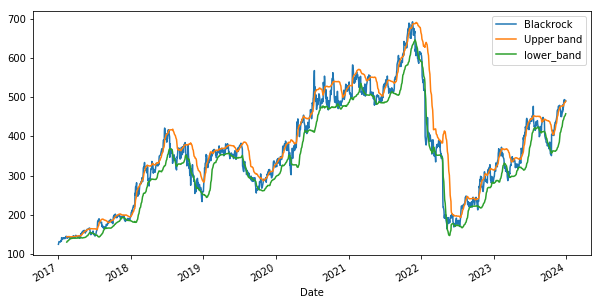

In [6]:
df[df.columns[0]].plot(label='Blackrock',figsize=(10,5))
df.upper_band.plot(label='Upper band')
df.lower_band.plot(label='lower_band')
plt.legend()
plt.show()

In [7]:
#Long Positions
df['short_entry']=df[df.columns[0]] <= df.lower_band
df['short_exit']=df[df.columns[0]] > df.lower_band
df['positions_short']=np.nan
df.loc[df.short_entry,'positions_short']=-1
df.loc[df.short_exit,'positions_short']=0
df.positions_short=df.positions_short.fillna(method='ffill')
df

,Open,Close,moving_average,moving_std_dev,upper_band,lower_band,short_entry,short_exit,positions_short
Date,,,,,,,,,
2017-01-03,124.959999,127.489998,NaN,NaN,NaN,NaN,False,False,NaN
2017-01-04,127.489998,129.410004,NaN,NaN,NaN,NaN,False,False,NaN
2017-01-05,129.220001,131.809998,NaN,NaN,NaN,NaN,False,False,NaN
2017-01-06,132.080002,131.070007,NaN,NaN,NaN,NaN,False,False,NaN
2017-01-09,131.479996,130.949997,NaN,NaN,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-22,494.000000,486.760010,468.123999,14.647868,485.701441,450.546557,False,True,0.0
2023-12-26,489.390015,491.190002,469.854332,13.952641,486.597501,453.111164,False,True,0.0
2023-12-27,491.239990,491.790009,471.320665,13.805915,487.887764,454.753567,False,True,0.0


In [8]:
#Short positions
df['Long_entry']=df[df.columns[0]]>=df.upper_band
df['Long_exit']=df[df.columns[0]]<df.upper_band
df['positions_long']=np.nan
df.loc[df.Long_entry,'positions_long']=1
df.loc[df.Long_exit,'positions_long']=0
df.positions_long=df.positions_long.fillna(method='ffill')
df

,Open,Close,moving_average,moving_std_dev,upper_band,lower_band,short_entry,short_exit,positions_short,Long_entry,Long_exit,positions_long
Date,,,,,,,,,,,,
2017-01-03,124.959999,127.489998,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-01-04,127.489998,129.410004,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-01-05,129.220001,131.809998,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-01-06,132.080002,131.070007,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2017-01-09,131.479996,130.949997,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,494.000000,486.760010,468.123999,14.647868,485.701441,450.546557,False,True,0.0,True,False,1.0
2023-12-26,489.390015,491.190002,469.854332,13.952641,486.597501,453.111164,False,True,0.0,True,False,1.0
2023-12-27,491.239990,491.790009,471.320665,13.805915,487.887764,454.753567,False,True,0.0,True,False,1.0


In [9]:
df[df['positions_short']==-1]['positions_short']

Date
2017-04-20   -1.0
2017-04-21   -1.0
2017-06-13   -1.0
2017-06-14   -1.0
2017-06-15   -1.0
             ... 
2023-10-06   -1.0
2023-10-12   -1.0
2023-10-13   -1.0
2023-10-16   -1.0
2023-10-18   -1.0
Name: positions_short, Length: 251, dtype: float64

In [10]:
df[df['positions_long']==1]['positions_long'][0:50]

Date
2017-03-15    1.0
2017-03-16    1.0
2017-03-20    1.0
2017-03-21    1.0
2017-03-29    1.0
2017-03-30    1.0
2017-03-31    1.0
2017-04-03    1.0
2017-04-04    1.0
2017-04-18    1.0
2017-04-25    1.0
2017-04-26    1.0
2017-04-27    1.0
2017-04-28    1.0
2017-05-01    1.0
2017-05-02    1.0
2017-05-03    1.0
2017-05-04    1.0
2017-05-05    1.0
2017-05-08    1.0
2017-05-09    1.0
2017-05-10    1.0
2017-05-11    1.0
2017-05-12    1.0
2017-05-15    1.0
2017-05-16    1.0
2017-05-25    1.0
2017-05-26    1.0
2017-05-30    1.0
2017-05-31    1.0
2017-06-01    1.0
2017-06-02    1.0
2017-06-05    1.0
2017-06-06    1.0
2017-06-07    1.0
2017-06-08    1.0
2017-06-09    1.0
2017-07-17    1.0
2017-07-18    1.0
2017-07-19    1.0
2017-07-20    1.0
2017-07-21    1.0
2017-07-24    1.0
2017-07-25    1.0
2017-07-26    1.0
2017-07-27    1.0
2017-07-28    1.0
2017-07-31    1.0
2017-09-12    1.0
2017-09-13    1.0
Name: positions_long, dtype: float64

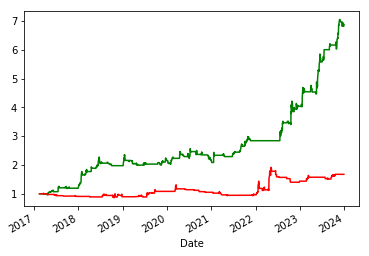

In [11]:
(1+df['positions_long']*df[df.columns[1]].pct_change().dropna()).cumprod().plot(color='g')
(1+df['positions_short']*df[df.columns[1]].pct_change().dropna()).cumprod().plot(color='r')

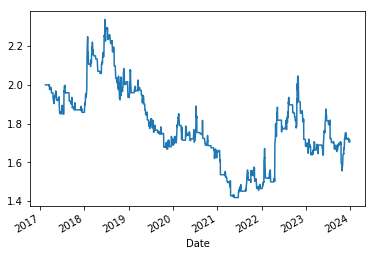

In [12]:
y=(1+df['positions_long'].shift(1)*df[df.columns[1]].pct_change().dropna()).cumprod()+(1+df['positions_short'].shift(1)*df[df.columns[1]].pct_change().dropna()).cumprod()
y.plot()

In [13]:
start='2021-01-01'
end='2021-12-31'

In [14]:
df['positions_long'].loc[start:end]

Date
2021-01-04    1.0
2021-01-05    0.0
2021-01-06    0.0
2021-01-07    0.0
2021-01-08    0.0
             ... 
2021-12-27    0.0
2021-12-28    0.0
2021-12-29    0.0
2021-12-30    0.0
2021-12-31    0.0
Name: positions_long, Length: 252, dtype: float64

In [15]:
(abs(df['positions_long'])*df[df.columns[1]]).replace(0,np.nan).loc[start:end].values


array([522.85998535,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan, 586.34002686,
       579.84002686, 565.16998291, 556.7800293 , 561.92999268,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan, 544.53

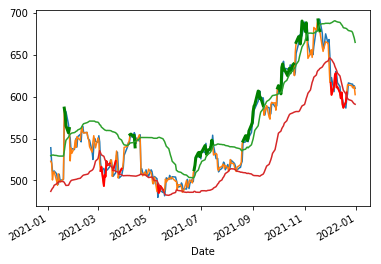

In [16]:
df['Open'].loc[start:end].plot()
df['Close'].loc[start:end].plot()
(df['positions_long']*df[df.columns[1]]).replace(0,np.nan).loc[start:end].plot(color='g',linewidth=3)
(abs(df['positions_short'])*df[df.columns[1]]).replace(0,np.nan).loc[start:end].plot(color='r',linewidth=2)
df.upper_band.loc[start:end].plot(label='Upper band')
df.lower_band.loc[start:end].plot(label='lower_band')

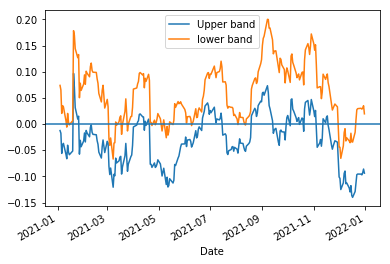

In [17]:
((df['Close']-df['upper_band'])/df['upper_band']).loc[start:end].plot(label='Upper band')
((df['Close']-df['lower_band'])/df['lower_band']).loc[start:end].plot(label='lower band')
plt.axhline(y=0.0)
plt.legend()
plt.show()